In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import PIL
from keras.preprocessing import image
print('All libs are imported')

All libs are imported


In [2]:
TRAINING_DIR ="./train/"
VALIDATION_DIR ='./valid/'
TESTING_DIR ='./test/'



In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255 ,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.4,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
valid_datagen=ImageDataGenerator(
    rescale=1/255.0 ,
    rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.4,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

test_datagen=ImageDataGenerator(
    rescale=1/255.0
)

#INSTANTIATE DATAGEN'S
train_flow = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(416,416)
    )
valid_flow=valid_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(416,416)
    )
test_flow=test_datagen.flow_from_directory(
    TESTING_DIR,
    batch_size=1,
    class_mode='categorical',
    target_size=(416,416)
    )


Found 20638 images belonging to 15 classes.
Found 4534 images belonging to 15 classes.
Found 4410 images belonging to 15 classes.


In [4]:
ACCURACY_THRESHOLD = 0.95
class MyCallbacks (tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('acc') >= ACCURACY_THRESHOLD :
            print('Training is stopped !!! \n {} Accuracy reached !'.format(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True
callbacks = MyCallbacks()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu',input_shape=(416,416,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(15,activation='softmax')
    
])
print(model.summary())
#we are using 'adam' optimizer and 'catagorical_entropy' loss 
model.compile( optimizer='adam' , loss ="categorical_crossentropy" , metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 414, 414, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 207, 207, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 205, 205, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 102, 102, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        1

In [6]:
EPOCHES = 30
history=model.fit(
              train_flow,
              epochs=EPOCHES,
              validation_data=valid_flow,
              callbacks=[callbacks]
             )


Epoch 1/30
645/645 [==============================] - 696s 1s/step - loss: 2.0148 - acc: 0.3351 - val_loss: 1.4488 - val_acc: 0.5179
Epoch 2/30
645/645 [==============================] - 821s 1s/step - loss: 1.1341 - acc: 0.6207 - val_loss: 0.9324 - val_acc: 0.6809
Epoch 3/30
645/645 [==============================] - 796s 1s/step - loss: 0.7950 - acc: 0.7297 - val_loss: 0.6716 - val_acc: 0.7704
Epoch 4/30
645/645 [==============================] - 707s 1s/step - loss: 0.6426 - acc: 0.7788 - val_loss: 0.6063 - val_acc: 0.7916
Epoch 5/30
645/645 [==============================] - 691s 1s/step - loss: 0.5023 - acc: 0.8258 - val_loss: 0.4982 - val_acc: 0.8273
Epoch 6/30
645/645 [==============================] - 677s 1s/step - loss: 0.4497 - acc: 0.8452 - val_loss: 0.4298 - val_acc: 0.8509
Epoch 7/30
645/645 [==============================] - 715s 1s/step - loss: 0.3763 - acc: 0.8717 - val_loss: 0.3954 - val_acc: 0.8633
Epoch 8/30
645/645 [==============================] - 721s 1s/step - 

Text(0.5, 1.0, 'Training and validation loss')

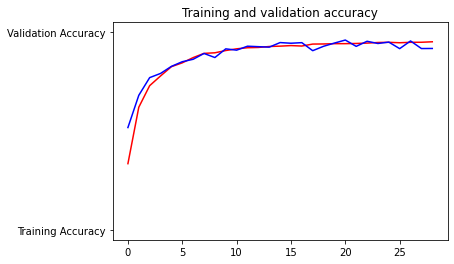

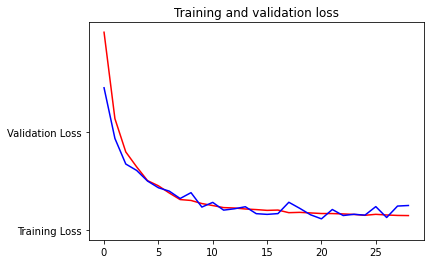

In [8]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')


In [9]:
model.evaluate(test_flow)

4410/4410 [==============================] - 43s 10ms/step - loss: 0.1466 - acc: 0.9517


[0.14655561745166779, 0.9517006874084473]

In [10]:
export_dir = './saved_model/1/'
tf.saved_model.save(model,export_dir)
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./saved_model/1/assets


In [11]:
import pathlib
tflite_model_file = pathlib.Path('./saved_model.tflite')
tflite_model_file.write_bytes(tflite_model)
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)
labels = train_flow.class_indices.keys()
labels =list(labels)
#labels.txt is created 
filename = 'labels.txt'
with open(filename,"w") as f :
    f.writelines(labels[0]+str("\n"))
    f.writelines(labels[1]+str("\n"))
interpreter = tf.lite.Interpreter(model_path="./saved_model.tflite")
interpreter.allocate_tensors()
inputs = interpreter.get_input_details()
outputs = interpreter.get_output_details()


In [12]:
print(inputs)

[{'name': 'conv2d_input', 'index': 0, 'shape': array([  1, 416, 416,   3], dtype=int32), 'shape_signature': array([ -1, 416, 416,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [13]:
print(outputs)

[{'name': 'Identity', 'index': 33, 'shape': array([ 1, 15], dtype=int32), 'shape_signature': array([-1, 15], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


# Summary :
## Training acc : [ 94.5 %  , 95.5 % ]
## Loss : max 16%
## Input shapes : 416 x 416  images
## Output Shapes : [ 1 , 15 ]

# We are ready for deployment !